In [1]:
from squlearn.feature_map.qcnn_feature_map import qcnn_feature_map
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
import numpy as np

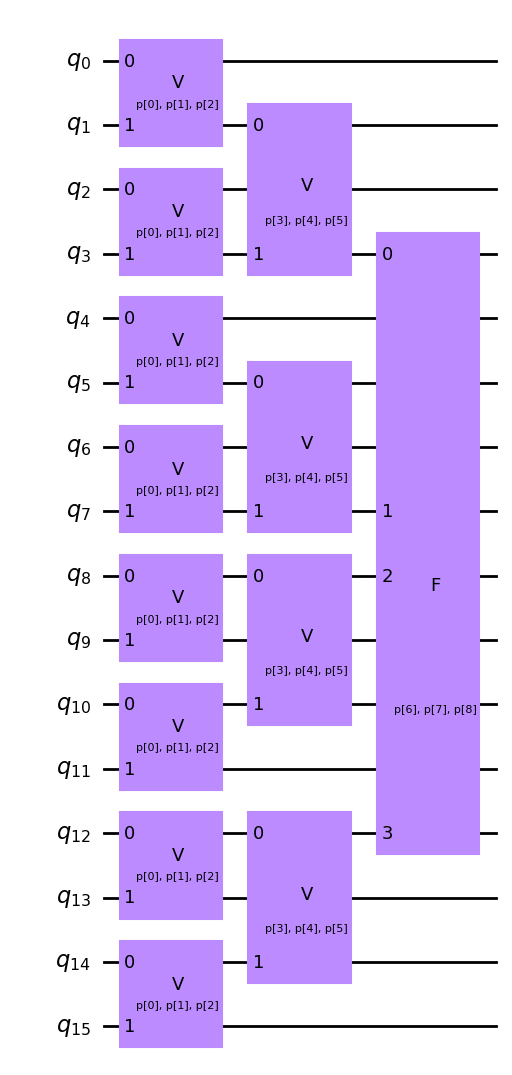

In [3]:
# Tests ohne Vorgabe der Anzahl der Qubits:

qcnn_without_qubits = qcnn_feature_map()


y = ParameterVector("y",6)
pooling_gate = QuantumCircuit(2)
pooling_gate.cry(y[0],0,1)
pooling_gate.crz(y[1],1,0)
pooling_gate.cry(y[2],1,0)
qcnn_without_qubits.pooling(pooling_gate,var_param=False) #TODO: var_param funktioniert noch nicht
qcnn_without_qubits.pooling(pooling_gate,var_param=False)



x = ParameterVector("x", 3)
fully_gate = QuantumCircuit(4)
fully_gate.crx(x[0],0,1)
fully_gate.crx(x[2],0,2)
fully_gate.crx(x[1],1,2)
qcnn_without_qubits.fully_connected(fully_gate)

qcnn_param_vec = ParameterVector("p", qcnn_without_qubits.get_num_params())
qcnn_without_qubits.get_circuit([],qcnn_param_vec).draw()